## Word2Vec using window Cooccurance

In [214]:
import numpy as np
la = np.linalg
from collections import defaultdict
from matplotlib import pyplot
%matplotlib inline  
import urllib2
from mpl_toolkits.mplot3d import Axes3D

In [215]:
def create_co_occ_mat(corpus,dist_corp):
    
    co_occ_mat = np.zeros((len(dist_corp),len(dist_corp)))
    
    for word in corpus:
        cur_ind = corpus.index(word)
        
        if cur_ind == 0:
            next_word = corpus[cur_ind + 1]            
            co_occ_mat[dist_corp.index(word),dist_corp.index(next_word)] += 1
            
        elif cur_ind == len(corpus) - 1:            
            prev_word = corpus[cur_ind - 1]            
            co_occ_mat[dist_corp.index(word),dist_corp.index(prev_word)] += 1
            
        else:    
            next_word = corpus[cur_ind + 1]            
            co_occ_mat[dist_corp.index(word),dist_corp.index(next_word)] += 1

            prev_word = corpus[cur_ind - 1]            
            co_occ_mat[dist_corp.index(word),dist_corp.index(prev_word)] += 1
            
    return co_occ_mat

In [216]:
def visualize(text):
    words = text.split(' ')
    dist_corp = list(set(words))  
    sigma = create_co_occ_mat(words,dist_corp)
    [U,S,V] = la.svd(sigma)
    fig = pyplot.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in xrange(len(dist_corp)):     
        ax.axis([-0.5,0.5,-0.5,0.5])
        ax.text3D(U[i,0],U[i,1],U[i,2],dist_corp[i])
        

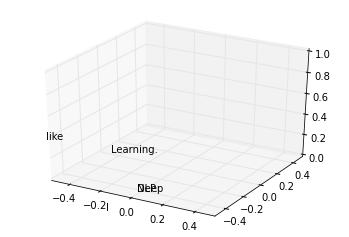

In [213]:
text = 'I like Deep Learning. I like NLP. '
visualize(text)